# Titanic - Data Project

Download the data from:
    https://www.kaggle.com/c/titanic-gettingStarted

In [1]:
#import the libraries you will use for:

#data storage, orientation, and manipulation [i.e. standard numpy and pandas imports]
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#standard plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#standard stats library
from scipy import stats

#command for showing plots in jupyter notebooks
%matplotlib inline

In [2]:
#importing data for analysis and vizualization

#make sure 'train.csv' is in this projects local file path

#import data into pandas df
df_titanic = pd.read_csv('train.csv')

In [3]:
#view data to get a look at what columns and information we have to work with

#get the top 10 rows of data
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [81]:
#use .info() on df to get a sense of what informaiton we might be missing in our dataset
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Notes on ambiguous columns:

    1.) Pclass = Passengar Class = what class was the passengar apart of [first, second, third]
    2.) SibSp = A Y/N if the passenger has a sibling onboard
    3.) Parch = A Y/N if the passenger had a parent or child onboard with them
    4.) Cabin = specifically the letter of the Cabin will provide information as to what deck the passenger was on [A-G]
    5.) Embarked = a letter classification as to where the passenger boarded from:
        - C = Cherbourg
        - S = Southampton
        - Q = Queenstown
    
Data that we might be missing:

    1.) Looks like we are missing a ton of information from the Cabin data
    2.) Looks like we are missing some information from the Age data
    3.) Looks like we are missing a little bit of informaiton from the Embarked data

#### QUESTIONS

Always remember, all good data analysis projects begins with trying to answer questions. Now that we know what column category data we have, think of some questions or insights we would like to obtain from the data.

First some basic questions:

    1.) Who were the passengers on the Titanic? (Ages, Gender, Class, etc.)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?
    
Then it makes sense to dig deeper, with a broader open-ended question:

    5.) What factors helped someone survive the sinking of the Titanic?

#### Analysis & Visualization

1.) Who were the passengers on the Titanic? (Ages, Gender, Class, etc.)

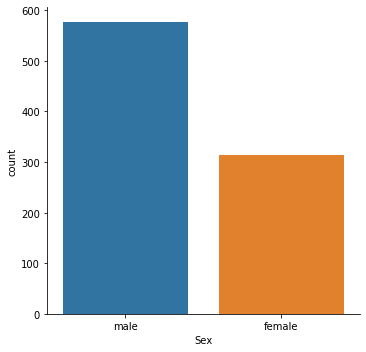

In [82]:
#visualize how many of each sex was onboard.

#use a catplot to count the number of sex onboard
sns.catplot(data = df_titanic, x = 'Sex', kind = 'count')

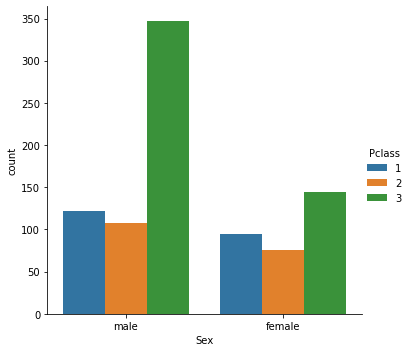

In [83]:
#visualize the quantity of each sex, BUT seperate them by class

#catplot creation
sns.catplot(data = df_titanic, x = 'Sex', hue = 'Pclass', kind = 'count')

OBSERVATION 1 - There looks to be a approximately a 2:1 count of males to females, AND 3.5:1 discrepancy count on third class males to any other class or gender.

In [10]:
#based on OBSERVATION 1, and knowledge of the 'women and children first policy', it might be useful to split children from adults.

#splitting children from adults

#create a function that takes in Age and Sex, returns 'child' if Age < 16, and returns 'Sex' if Age >= 16
def is_passenger_child(passenger):
    sex,age = passenger    
    if age < 16:
        return 'child'
    else:
        return sex

df_titanic['Person'] = df_titanic[['Sex','Age']].apply(is_passenger_child, axis = 1)

In [85]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


HOW/THOUGHT PROCESS:

    1.) What's the end goal of splitting children from adults?
        - Based on the open-end question, 'what factors helped someone survived', and the life boat policy 'women and children first'; it would make sense to categorize based on male, female, and child.
        - Therefore, having a column that allows us to group by the above cats and count would be useful.
        - END GOAL: column that separates [male, female, and child]
        
    2.) How would you classify a child?
        - using under the age of 16 as the marker for a child.
        
    3.) How would you update the df to accomodate this change?
        - if the age of a passenger is less than 16 populate a new row with 'child' value
        - if not under 16 population the new row with the 'Sex' column data
        
    4.) What is the data_sci context chain to give you a starting point to think, and a troubleshooting avenue?
        - Because we are using logic or making a calculation I would classify this a data manipulation
        - data manipulation -> working with data part 3
        - .apply() to allow you to make a function and apply it to the dataframe, to make a new column
        
Note on how the .apply() method works, which you can also find a TLDR in Working Through Issues - Data Projects:

    - the .apply() method can take in a created function and will automatically pass the function the specified columns of the dataframe that the method .apply() was applied to.
    

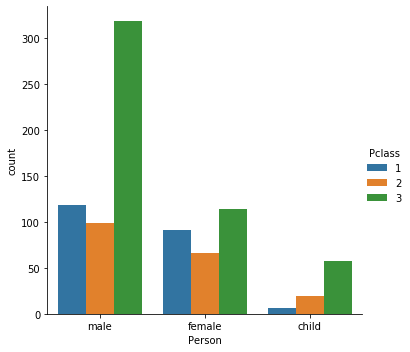

In [86]:
#visualize the quantity of male, female, and child, split by class

#plot using catplot
sns.catplot(data = df_titanic, x = 'Person', hue = 'Pclass', kind = 'count')

OBSERVATION 2 - There is a lot more third class people than the other classes, approximately a 3:1 ratio of males in third class to the others, and approximately 75% of the children were in the third class.

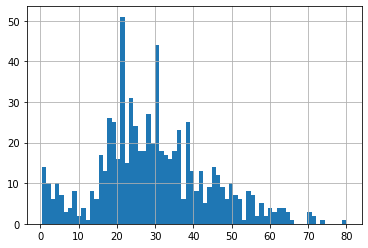

In [87]:
#drill down on age to get a finer grain on the passengers onboard.

#create a histogram to display the view of ages of passengers onboard

#hist through pandas
df_titanic['Age'].hist(bins = 70)

C:\Users\ggebu\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ggebu\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([14., 10.,  6., 10.,  7.,  3.,  4.,  8.,  2.,  4.,  1.,  8.,  6.,
        17., 13., 26., 25., 16., 51., 15., 31., 24., 18., 18., 27., 20.,
        44., 18., 17., 16., 18., 23.,  6., 25., 13.,  8., 13.,  5.,  9.,
        14., 12.,  9.,  6., 10.,  7.,  6.,  1.,  8.,  7.,  2.,  5.,  2.,
         4.,  3.,  4.,  4.,  3.,  1.,  0.,  0.,  0.,  3.,  2.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.]),
 array([ 0.42      ,  1.55685714,  2.69371429,  3.83057143,  4.96742857,
         6.10428571,  7.24114286,  8.378     ,  9.51485714, 10.65171429,
        11.78857143, 12.92542857, 14.06228571, 15.19914286, 16.336     ,
        17.47285714, 18.60971429, 19.74657143, 20.88342857, 22.02028571,
        23.15714286, 24.294     , 25.43085714, 26.56771429, 27.70457143,
        28.84142857, 29.97828571, 31.11514286, 32.252     , 33.38885714,
        34.52571429, 35.66257143, 36.79942857, 37.93628571, 39.07314286,
        40.21      , 41.34685714, 42.48371429, 43.62057143, 44.75742857,
        45.89428

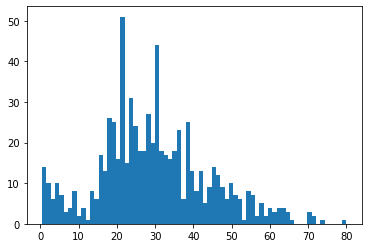

In [88]:
#create a histogram through plotting libraries
plt.hist(df_titanic['Age'], bins = 70)

In [89]:
#get a quick overall count of how many males, females, and children there are
df_titanic['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

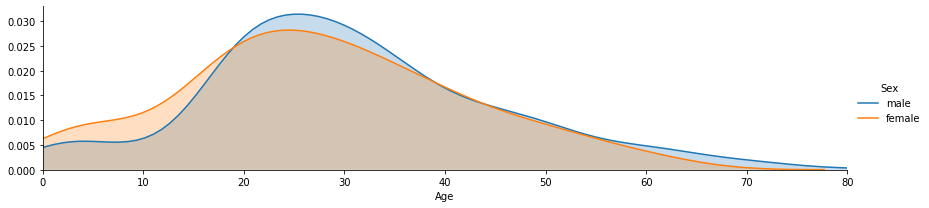

In [96]:
#use FacetGrid to plot multiple kde plots, as another way of visualizing the distribution of ages

#age v. sex
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
figure = sns.FacetGrid(df_titanic, hue = 'Sex', aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
figure.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = df_titanic['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
figure.set(xlim=(0,oldest))

#Finally add a legend
figure.add_legend()

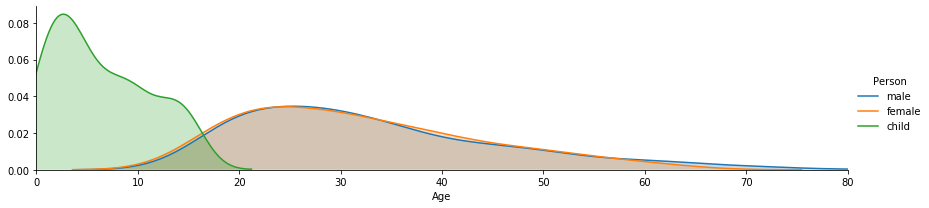

In [98]:
#FacetGrid Age v. Column that includes sex and child

figure = sns.FacetGrid(df_titanic, hue = 'Person', aspect = 4)

figure.map(sns.kdeplot, 'Age', shade = True)

oldest = df_titanic['Age'].max()

figure.set(xlim = (0,oldest))

figure.add_legend()

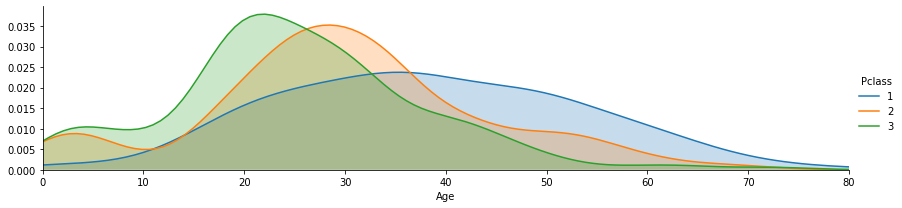

In [101]:
#FacetGrid Age v. Class

figure = sns.FacetGrid(df_titanic, hue = 'Pclass', aspect = 4)

figure.map(sns.kdeplot, 'Age', shade = True)

oldest = df_titanic['Age'].max()

figure.set(xlim = (0,oldest))

figure.add_legend()

OBSERVATION 3 - Age has the highest density in the mid 20s for both sexes. Where the child density skews towards the under 10 range. As for how class impacts the density on age, it looks like the lower the class the younger you would be. Which would track based on the economics of wealth creation based on age.

FINAL OBSERVATIONS FOR Q1 - Without looking at the survival rates, it looks like males, and specifically younger poorer males were disproportionately on the Titanic's main voyage.

2.) What deck were the passengers on and how does that relate to their class?

HOW/THOUGHT PROCESS:
    
    1.) Create a simple catplot/bar graph to show the distribution of passengers based on deck level.
        - keeping in mind that decks are based on the Cabin column letter, and range from A-G
        - x = Deck Level & y = count/quantity
        
    2.) Create a similar catplot/bar graph BUT include the 'hue' of Pclass to see how the class is distributed by deck
        - assuming that the deck is directly correlated to the class of ticket purchased
        
    3.) Answering where the passengers are from by creating a catplot based on the count of passengers, embarked data, and a hue of class.
        - Embarked Location -> C = Cherbourg, Q = Queenstown, S = Southampton
        - What interesting questions could you ask about the embarked data that would require addition information not in the dataset?
        

    1.) Create a simple catplot/bar graph to show the distribution of passengers based on deck level.
        - keeping in mind that decks are based on the Cabin column letter, and range from A-G
        - x = Deck Level & y = count/quantity
        
After looking at the info and head of the df, as we knew from before, we are missing a lot of the Cabin information. Therefore, we will have to drop all null values to get a catplot. BUT I want to try and see if we can include the nulls to get insight into class [i.e. if all third class passengers are missing cabins then can we assume they are all from lower decks. If no clear trend then it is just simply missing information and we can remove it]

REMEMBER - Null values are not strings they are actually NaN values - therefore you wont be able to pull a value from them. You will either need to drop or fillna.

In [137]:
# Creating catplot for deck vs. quantity of passengers:

# Remove NULL values from cabin:
# select cabin col from df_titanic and make a placeholder df
df_cabin = df_titanic['Cabin']

# drop NULL values inplace
df_cabin.dropna(inplace = True)

# Pulling the deck level out of the cabin column through loop:
# create a list to append deck level to
deck_list = []

# for loop through the df_cabin to pull out the deck letter
for cabin in df_cabin:
    deck_list.append(cabin[0])

In [146]:
# Checking data and preping for plotting:
# check to make sure list has just the deck letter
# deck_list

# re-declare deck_list as a dataframe for plotting + make sure column is named
df_deck = DataFrame(deck_list, columns = ['Deck'])

# could also name the column like:
# df_deck.columns = ['Deck']

# show df
# df_deck

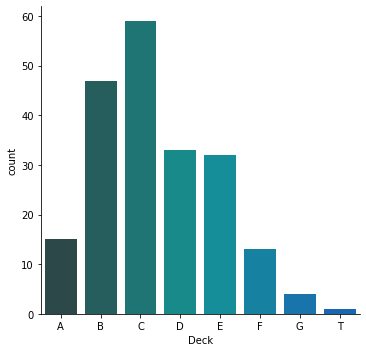

In [151]:
# plot catplot
sns.catplot(data = df_deck, x = 'Deck', kind = 'count', palette = 'winter_d', order = ['A','B','C','D','E','F','G', 'T'])

In [152]:
# There is no T deck, therefore removing it:
df_deck = df_deck[df_deck['Deck'] != 'T']

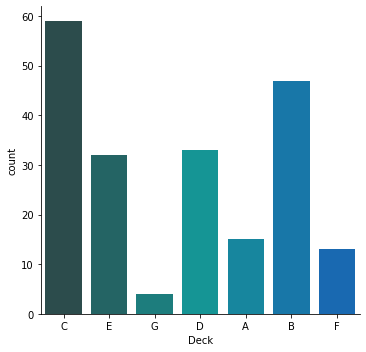

In [154]:
sns.catplot(data = df_deck, x = 'Deck', kind = 'count', palette = 'winter_d')

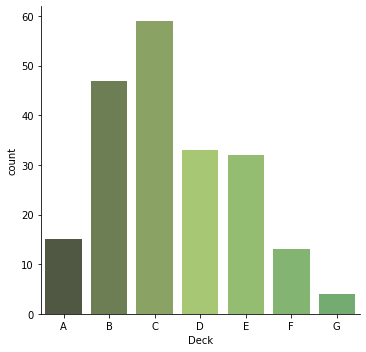

In [157]:
# Order the decks in alphabetical order
sns.catplot(data = df_deck, x = 'Deck', kind = 'count', palette = 'summer_d', order = ['A','B','C','D','E','F','G'])

In [162]:
df_deck['Deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: Deck, dtype: int64

Quick note: I used 'winter_d' and 'summer' as my palettes, but you can choose any palette you want. Check out this link for more palette names, you can add '_d' to the end of any palette name to make it darker.

Link: http://matplotlib.org/users/colormaps.html

   2.) Create a similar catplot/bar graph BUT include the 'hue' of Pclass to see how the class is distributed by deck
        - assuming that the deck is directly correlated to the class of ticket purchased

HOW/THOUGHT PROCESS:

    - You will need to add/or re-create the Deck columns BUT connect it to the full Titanic df, so you can use the hue argument.
    - Tried using a function that pulls the first character of the string and returning it, then passing that to the df through .apply(). That sparked a chained assignment warning, that I don't think will be able to be fix through this method because we are indexing the entire df.
    
    - Therefore, I think I should try to split off the Cabin column, apply a for loop to remove the letter into a list. Merging the two series, making a dict and mapping it to the df? [or merging again?]


In [228]:
# Creating new df where we remove only the row where the Cabin has a Null value:
df_cabin = df_titanic.dropna(subset = ['Cabin'])

In [214]:
df_cabin.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [276]:
# pull 'Cabin' col as separate series
ser_cabin = df_cabin['Cabin']
ser_cabin.columns = ['Cabin']
result = ser_cabin.reset_index(drop = True)



# fill list with deck letters
deck_list2 = []

for cabin in ser_cabin:
    deck_list2.append(cabin[0])
    
ser_deck = Series(deck_list2, name = 'Deck')

# make list a series and merge it with 'Cabin' series based on index
df_cabinAndDeck = pd.merge(result, ser_deck, left_index = True, right_index = True)

# merge cabin and deck to df_cabin
df_cabinWithDeck = pd.merge(df_cabin, df_cabinAndDeck, left_on = 'Cabin', right_on = 'Cabin', how = 'left')


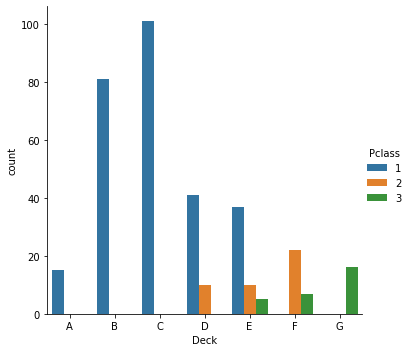

In [280]:
# plotting catplot for x = deck v. y = quantity with hue of class
sns.catplot(data = df_cabinWithDeck, x = 'Deck', hue = 'Pclass', kind = 'count', order = ['A','B','C','D','E','F','G'])

In [282]:
df_cabinWithDeck['Deck'].value_counts()

C    101
B     81
E     52
D     51
F     29
G     16
A     15
T      1
Name: Deck, dtype: int64

In [ ]:
'''
This didn't work like I wanted it to, I am going to move on and come back to this question
'''

    3.) Answering where the passengers are from by creating a catplot based on the count of passengers, embarked data, and a hue of class.
        - Embarked Location -> C = Cherbourg, Q = Queenstown, S = Southampton
        - What interesting questions could you ask about the embarked data that would require addition information not in the dataset?

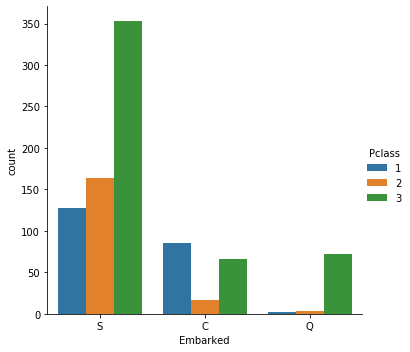

In [204]:
# Create a simply catplot x = Embarked, hue = 'Pclass', y = quantity
sns.catplot(data = df_titanic, x = 'Embarked', hue = 'Pclass', kind = 'count')

OBSERVATION 4 - In general a lot more passengers came from Southampton. But the most interesting thing is nearly all passengers embarking from Queenstown were in third class. Therefore, and interesting question would be to ask what were the economics like in Queenstown as this time?

    4.) Who was alone and who was with family?
    
HOW/THROUGH PROCESS:

    - use the information available to create a new columns that indicates whether someone was alone or with family
    - make a simply catplot showing the difference in people travelling alone vs. with family

In [284]:
# look at the data
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
# based on the SibSp and Parch columns, we can simply add them together to get a binary Y/N to with Family or Alone

# make an Alone column:
df_titanic['Alone'] = df_titanic['SibSp'] + df_titanic['Parch']

In [21]:
# convert the Alone column data from numbers to description for easier graph readability

# create function to .apply() to df
def is_alone(passenger):
    if passenger == 0:
        return 'Alone'
    else:
        return 'With Family'
    
df_titanic['Travelling'] = df_titanic['Alone'].apply(is_alone)

In [297]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Travelling
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,With Family


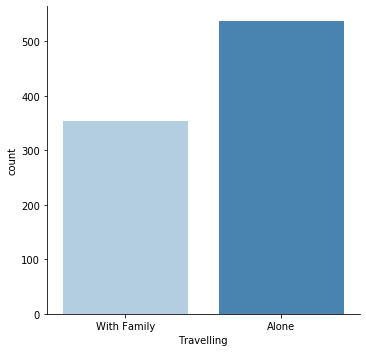

In [298]:
# plotting catplot of count on travelling with family or alone
sns.catplot(data = df_titanic, x = 'Travelling', kind = 'count', palette = 'Blues')

Another way to do the above, that I think is worth keeping in mind

In [299]:
# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column
df_titanic['Alone'] =  df_titanic.Parch + df_titanic.SibSp
df_titanic['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

# Look for >0 or ==0 to set alone status
df_titanic['Alone'].loc[df_titanic['Alone'] >0] = 'With Family'
df_titanic['Alone'].loc[df_titanic['Alone'] == 0] = 'Alone'

# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

In [ ]:
# Now let's get a simple visualization!
sns.factorplot('Alone',data=df_titanic,palette='Blues')

 5.) What factors helped someone survive the sinking of the Titanic?

HOW/THOUGHT PROCESS:

    - Make a catplot plot to show a count of Survived v. did not Survive
    - See how class might have impacted survival rate. [i.e. x = Class y = Survival
    - Use a similar plot as above, but see if gender/child had an impact on survival rate
    - Use a linear model plot to see if Age had an impact on survival rate
    - Using a similar model to above see if age + class has an impact
    - Using a similar model to above see if age + sex has an impact

Further questions to finish off this data analysis project:

    1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
    2.) Did having a family member increase the odds of surviving the crash?

In [11]:
# Check data for plan of attack:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,No,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,No,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,No,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Yes,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Yes,child


In [5]:
# Make new Survivor column, for easier readability as opposed to 1 and 0:

# Use the .map() method on the df to map a dict to a new column
df_titanic['Survivor'] = df_titanic['Survived'].map({0:'No',1:'Yes'})

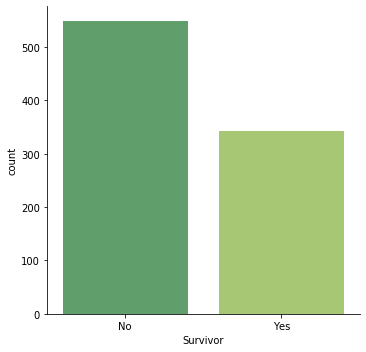

In [7]:
# Make a catplot to show Survivor v. Quantity
sns.catplot(data = df_titanic, x = 'Survivor', kind = 'count', palette = 'summer')

OBSERVATION 5.1 - It seems to be that there is an approximate 2:1 ratio of people that did not survive vs. survived.

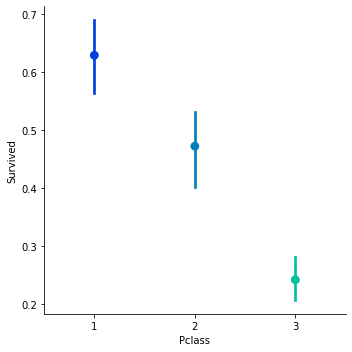

In [9]:
# Using catplot, see if 'Class' had an impact on survivor rate:
sns.catplot(data = df_titanic, x = 'Pclass', y = 'Survived', palette = 'winter', kind = 'point')

OBSERVATION 5.2 - It looks like class did have an impact on survival rate. Where the lower the class the worse the survival rate. With that said, there does seem to be a larger variance, of survival rate, in the first two classes. My intuition, based on prior knowledge is that the variance has a correlation to age and/or gender.

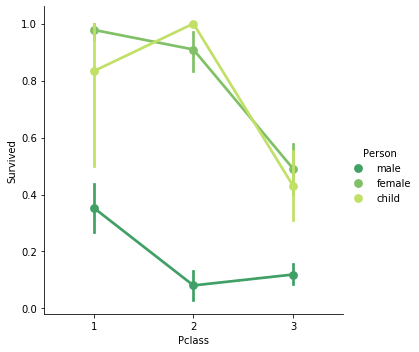

In [12]:
# Create a point plot, BUT add if a hue = 'Person' to see if there is Gender/Child impact on survival rate
sns.catplot(data = df_titanic, x = 'Pclass', y = 'Survived', hue = 'Person', palette = 'summer', kind = 'point')

OBSERVATION 5.3 - It does look like the general trend is that males had the worst survival rate among all classes. AND is looks like third class in general had the worst survival rate irrespective of gender/child.

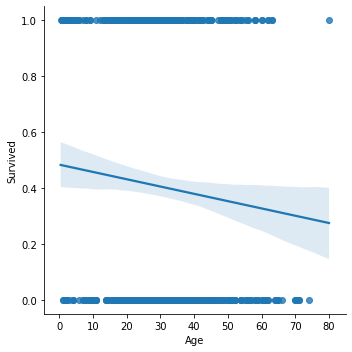

In [13]:
# Linear Model the Age v. Survival Rate to see if Age had an impact:
sns.lmplot(data = df_titanic, x = 'Age', y = 'Survived', palette = 'winter_d')

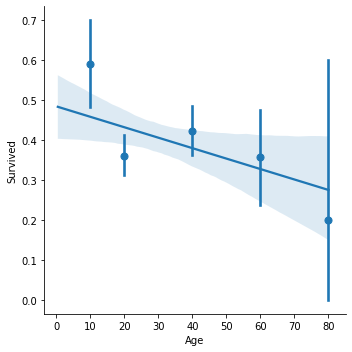

In [18]:
# Create the same plot as above, BUT create some age bins to get a better understanding of how age impacted survivor rate
generation_bins = [10,20,40,60,80]
sns.lmplot(data = df_titanic, x = 'Age', y = 'Survived', palette = 'summer_d', x_bins = generation_bins)

OBSERVATION 5.4 - Broadly speaking it looks like the linear trend suggests that the older you are the less likely you were to survive. Keeping in mind that there also seems to be a little be more variance on that side as well.

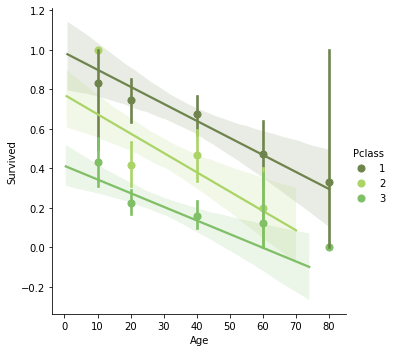

In [17]:
# Including a hue of Pclass to see if Class + Age has an impact on Survivor Rate:
sns.lmplot(data = df_titanic, x = 'Age', y = 'Survived', hue = 'Pclass', palette = 'summer_d', x_bins = generation_bins)

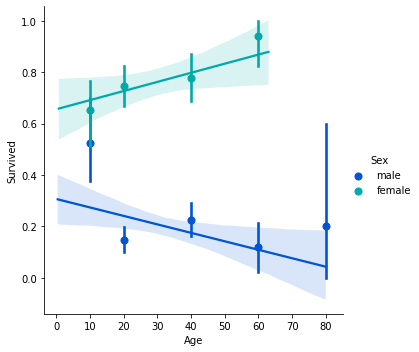

In [19]:
# Including a hue of Sex to see if Sex + Age has an impact on Survivor Rate:
sns.lmplot(data = df_titanic, x = 'Age', y = 'Survived', hue = 'Sex', palette = 'winter', x_bins = generation_bins)

OBSERVAION 5.5 - A very interesting observation, that the older the female the better suvivor rate.

Further questions to finish off this data analysis project:

    1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
    2.) Did having a family member increase the odds of surviving the crash?

1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

HOW/THOUGHT PROCESS:

    - for practice re-establish the df_deck dataframe with the 'Deck' column.
    - my intuition suggests that the closer the deck is to A the better the suvival rate will be.
    - I think I can get away with a linear model plot to show the trend of survival rate based on deck order

In [8]:
# Creating a separate df_deck to illustrate the level the passengers cabin was on:

# Removing NULL values on the cabin column
df_deck = df_titanic.dropna(subset = ['Cabin'])

In [9]:
# Creating a Deck column by grabbing the first letter of the Cabin column data:

# create a function to pull the first character in the Cabin string
def pull_deck_from_cabin(passenger):
    level = passenger[0]
    return level

In [31]:
df_deck.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,Person
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,female
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,No,male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Yes,child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Yes,female
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,Yes,male
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Yes,male
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,No,male
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Yes,female
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,Yes,female


In [26]:
# testing function

pull_deck_from_cabin('C85')

'C'

In [10]:
# .apply() pull_deck_from_cabin function to the df_temp1 dataframe, to make to column in dataframe
df_deck['Deck'] = df_deck['Cabin'].apply(pull_deck_from_cabin)

C:\Users\ggebu\AppData\Local\Temp\ipykernel_13792\4276676119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deck['Deck'] = df_deck['Cabin'].apply(pull_deck_from_cabin)


In [11]:
df_deck.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,D
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,A
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,B
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,D


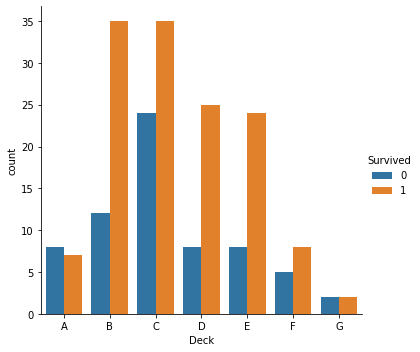

In [40]:
# Create lmplot to show the relation between deck and survival rate:

#plotting
sns.catplot(data = df_deck, x = 'Deck', hue = 'Survived', kind = 'count', order = ['A','B','C','D','E','F','G'])
#sns.lmplot(data = df_deck, x = 'Survived', y = 'Deck', palette = 'summer_d', x_bins = ['A','B','C','D','E','F','G'])

In [ ]:
#sns.lmplot(data = df_deck, x = 'Survived', y = 'Deck', palette = 'summer_d', x_bins = ['A','B','C','D','E','F','G'])
'''
There is an issue with the lmplot in the situation. Because the Decks are letters, the plotting function can't iterate through them.
Therefore, the quick and dirty solution would be to covert the Decks to numbers and then do a lmplot.
Additionally, it looks like there is a way to conver the labels back, through some axis label looping, BUT that seems over
complicated for this application.
'''

THOUGHT PROCESS:

    - create a dictionary that links letter to number and use the .map() to map this to a new column

In [6]:
deck_number = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}

In [14]:
df_deck['Deck Number'] = df_deck['Deck'].map(deck_number)

C:\Users\ggebu\AppData\Local\Temp\ipykernel_13792\4165309505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deck['Deck Number'] = df_deck['Deck'].map(deck_number)


In [16]:
df_deck.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Deck Number
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,3.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E,5.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,G,7.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C,3.0
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,D,4.0
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,A,1.0
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,C,3.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,B,2.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,D,4.0


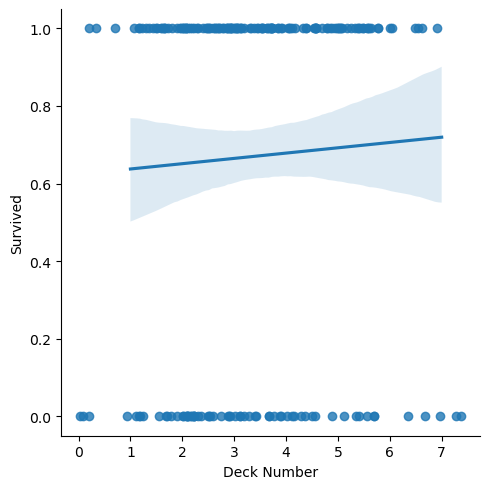

In [19]:
sns.lmplot(data = df_deck, x = 'Deck Number', y = 'Survived', palette = 'summer_d', x_jitter = True)

OBSERVATION FINAL QUESTIONS 1.1 - My intuition was that the higher the deck the better chance someone would have of surviving, BUT based on the graphic it looks like other factors would place a larger role in survival rate. Yes, decks B,C,D, and E have larger survival rates than the other decks, BUT it looks like they also have the majority of the passangers which shews the chances for survival. Finally, it would be important to see if the higher survival rate decks correspond to where the women and children are. [i.e. based on the previous knowledge, and observation, that women and children had a better survival rate that men no the titanic irrespective of deck]

OBSERVATION FINAL QUESTIONS 1.2 - The lmplot does really give us much useful information, aside from the exercise of creating the plot and using the mapping method.

2.) Did having a family member increase the odds of surviving the crash?

THOUGH PROCESS:

    1.) Take df_titanic and plot a count plot x = Travilling v. y = quantity and hue = survived

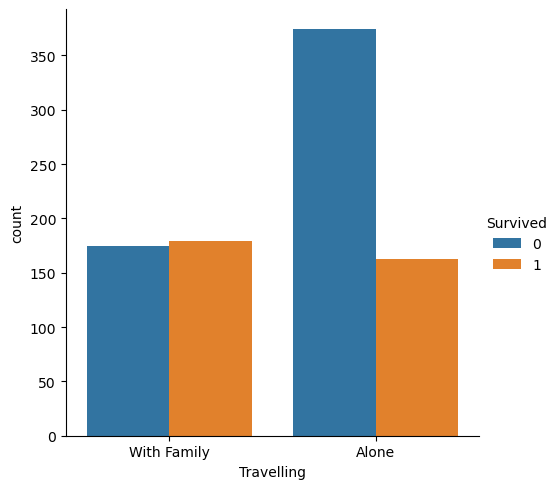

In [23]:
sns.catplot(data = df_titanic, x = 'Travelling', hue = 'Survived', kind = 'count')

OBSERVATION FINAL QUESTIONS 2.1 - Based on the above graphic it looks like being with family did not have a large impact on your survival, BUT travelling alone meant that you chance of survival greatly decreased. Similar to the OBSERVATION FINAL QUESTIONS 1.1, I think this is more so impacted by gender and age. [i.e. there were a lot more men travelling alone in lower classes that didn't survive, which suggests this is the strongest indicator of survival]

In [24]:
# DATA PROJECT - TITANIC - COMPLETED